In [1]:
import matplotlib.pyplot as plt
import csv
import typing
import numpy as np
# recording 60 seconds of data
TIME = 20

In [2]:
# get the average of the data
def readData(f : typing.TextIO):
    
    data_sum = np.zeros(TIME)
    data_count = np.zeros(TIME)

    reader = csv.reader(f, delimiter=',')
    
    START = int(float(reader.__next__()[0]))
    for r in reader:
        time = int(float(r[0]))
        data = float(r[1])

        #  only collect data is this time interval
        if time < START + TIME:
            data_sum[time - START] += data
            data_count[time - START] += 1

    return np.divide(data_sum, data_count)

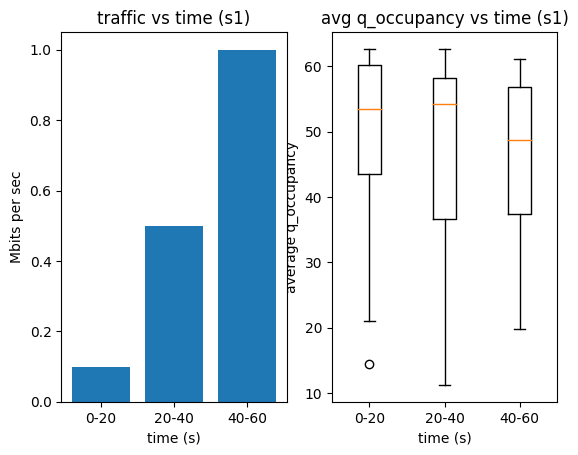

In [3]:
with open("s1_data_0.1M.txt", "r") as d1, \
     open("s1_data_0.5M.txt", "r") as d2, \
     open("s1_data_1M.txt", "r") as d3 :

     data_1 = readData(d1)
     data_2 = readData(d2)
     data_3 = readData(d3)

     plt.subplot(1, 2, 1) # row 1, col 2 index 1
     plt.bar(['0-20', '20-40', '40-60'], [0.1, 0.5, 1])
     plt.title("traffic vs time (s1)")
     plt.xlabel('time (s)')
     plt.ylabel('Mbits per sec')

     plt.subplot(1, 2, 2) # index 2
     plt.boxplot([data_1, data_2, data_3], labels=['0-20', '20-40', '40-60'])
     plt.title("avg q_occupancy vs time (s1)")
     plt.xlabel('time (s)')
     plt.ylabel('average q_occupancy')

     plt.show()